<a href="https://colab.research.google.com/github/sjdee/Market-Analysis-Techniques/blob/master/Compare_features_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6

# Standardizing the features
# df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
# df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

# df = df.drop(['Time','Amount'], axis = 1)
# df.head()
import time
from time import gmtime, strftime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import warnings
import warnings
warnings.filterwarnings('ignore')


def run_classifier (df,minify_data):  

  features = df.iloc[:,5:-10]
  
  labels = df.loc[:,'day10']
  
  report_data = []

  
  # 32,42
  for i in range(1):

    X_train, X_test, y_train, y_test = train_test_split(features.iloc[:,:-2], labels, test_size=0.3,random_state=0)

    # Scaling values in the feature set
    scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_test = scaling.transform(X_test)


    start = time.time()
    
    # Create a random forest Classifier
    clf = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=100)

    # Train the model using the training sets
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred,labels =[0.0,1.0,2.0])
    
    
    end = time.time()
    print("classifier took " + str((end - start)) + " seconds")
    
    
    f1_scores =[] 
    f1_scores.insert(0, metrics.f1_score(y_test, y_pred, average='micro'))
    f1_scores.insert(1, metrics.f1_score(y_test, y_pred, average='weighted'))
    
    print("accuracy", accuracy)
    print("f1 micro", f1_scores[0])
    print("f1 weighted",f1_scores[1])
    print(report)
    

#     accumulate_data(report_data,report,accuracy,labels.iloc[:,i].name,"Random Forest",minify_data,f1_scores)
    
  return report_data


In [0]:
# https://towardsdatascience.com/data-pre-processing-techniques-you-should-know-8954662716d6
import time
from time import gmtime, strftime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import warnings
import warnings
warnings.filterwarnings('ignore')


def run_classifier_on_features (df,minify_data):  

  features = df.iloc[:,:-1]
  
  labels = df.loc[:,'day10']
  
  report_data = []

  
  # 32,42
  for i in range(1):

    X_train, X_test, y_train, y_test = train_test_split(features.iloc[:,:-2], labels, test_size=0.3,random_state=0)

    # Scaling values in the feature set
    scaling = MinMaxScaler(feature_range=(0,1)).fit(X_train)
    X_train = scaling.transform(X_train)
    X_test = scaling.transform(X_test)


    start = time.time()
    
    # Create a random forest Classifier
    clf = RandomForestClassifier(n_jobs=2, random_state=0,n_estimators=100)

    # Train the model using the training sets
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred,labels =[0.0,1.0,2.0])
    
    
    end = time.time()
    print("classifier took " + str((end - start)) + " seconds")    
    
    f1_scores =[] 
    f1_scores.insert(0, metrics.f1_score(y_test, y_pred, average='micro'))
    f1_scores.insert(1, metrics.f1_score(y_test, y_pred, average='weighted'))
    
    print("accuracy", accuracy)
    print("f1 micro", f1_scores[0])
    print("f1 weighted",f1_scores[1])
    print(report)
    

#     accumulate_data(report_data,report,accuracy,labels.iloc[:,i].name,"Random Forest",minify_data,f1_scores)
    
  return report_data


In [0]:
def accumulate_data(report_data,report,accuracy,day_name,model_name,minify_data,f1_scores):
      
  if(minify_data == True):

    row = {}
    row['day'] = day_name.replace("day", "") 
    row['accuracy'] = accuracy
    row['f1score_macro'] = f1_scores[0]
    row['f1score_micro'] = f1_scores[1]
    row['f1score_weigthed'] = f1_scores[2]
    # row['model'] = model_name

    # unravel report for the given day       
    lines = report.split('\n')
    for line in lines[2:-5]:

      row_data = line.split('     ')

      # update recall for sell
      if(float(row_data[1])==0.0):
        row['sell_recall']= float(row_data[3])
      # update precison for buy
      if(float(row_data[1])==2.0):
        row['buy_precison']= float(row_data[2])

    report_data.append(row)


  else:    
    lines = report.split('\n')
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('     ')
        row['model'] = model_name
        row['accuracy'] = accuracy
        row['day'] = labels.iloc[:,i].name
        row['class'] = row_data[1]
        row['precision'] = float(row_data[2])
        row['recall'] = float(row_data[3])
        row['f1_score'] = float(row_data[4])
        row['support'] = float(row_data[5])
        report_data.append(row)

  return report_data

In [0]:
sectors = ['Communication Services', 'Consumer Discretionary','Consumer Staples', 'Energy', 'Financials', 'Health Care', 'Industrials', 'Information Technology', 'Materials', 'Real Estate', 'Utilities']

In [0]:
# https://towardsdatascience.com/multivariate-time-series-forecasting-using-random-forest-2372f3ecbad1
# https://towardsdatascience.com/accuracy-recall-precision-f-score-specificity-which-to-optimize-on-867d3f11124

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = '18pa4iuqvz2SX5RYrUdn09bDU8eNm2hqI'

# 2. Load a file by ID 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('sp500_transformation_input.xlsx')

In [0]:
import pandas as pd

df_all = pd.read_excel('sp500_transformation_input.xlsx')

In [0]:
df_all.set_index('Sector', inplace=True)
print(df_all.shape)

# Remove all nulls
df_null_removed = df_all.dropna()
print(df.shape)

df = df_null_removed

(429187, 45)
(157212, 26)


In [0]:
check_each_sector = False
minify = True

In [0]:
from google.colab import files

if(check_each_sector == True):
   
  for k in range(len(sectors)):
    print('Running classifier by sector.')

    df_sectorised = df.loc[sectors[k]]
    
    report = run_classifier(df_sectorised,minify)
    
else:
  
  print('All columns')
  report = run_classifier(df,minify)
  
  print('Removed Historical Market Cap')
  report = run_classifier(df1,minify)
  
  print('Removed 1 + Best CAPEX')
  report = run_classifier(df2,minify)
  
  print('Removed 2 + BEST EPS')
  report = run_classifier(df3,minify)

Pearson Correlation Matrix for 22 Components selected by PCA


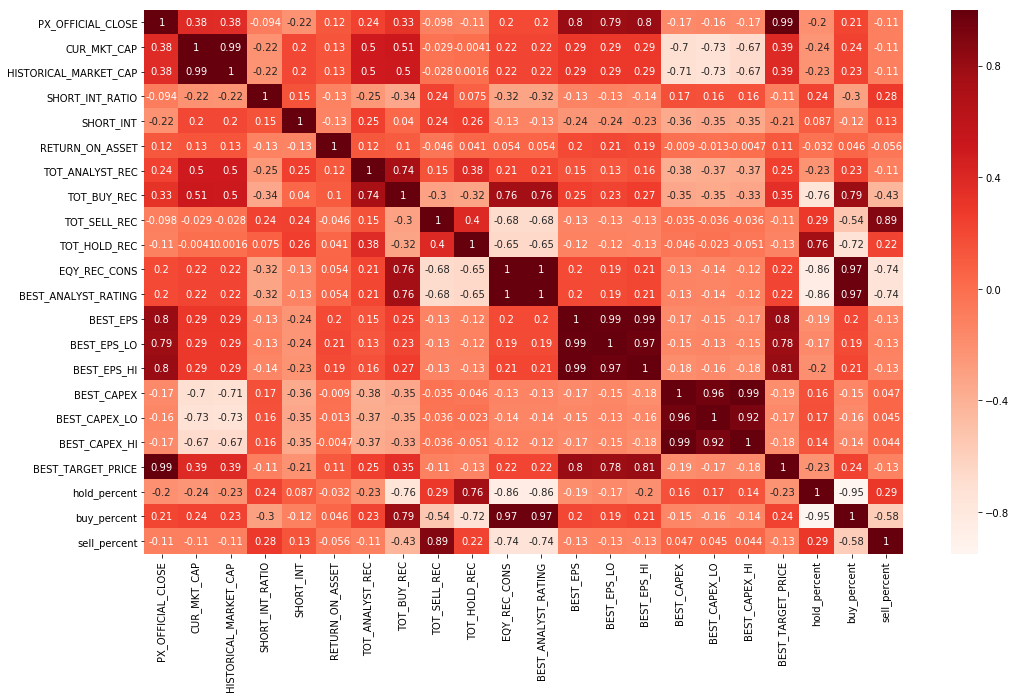

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df_null_removed.loc[:,['PX_OFFICIAL_CLOSE', 'CUR_MKT_CAP', 'HISTORICAL_MARKET_CAP','SHORT_INT_RATIO', 'SHORT_INT', 'RETURN_ON_ASSET', 'TOT_ANALYST_REC', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC', 'EQY_REC_CONS', 'BEST_ANALYST_RATING', 'BEST_EPS', 'BEST_EPS_LO', 'BEST_EPS_HI', 'BEST_CAPEX', 'BEST_CAPEX_LO', 'BEST_CAPEX_HI', 'BEST_TARGET_PRICE', 'hold_percent', 'buy_percent', 'sell_percent']]

correlation = df2.corr(method='pearson')

print("Pearson Correlation Matrix for 22 Components selected by PCA")
plt.figure(figsize=(17,10))
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
df.columns

Index(['Unnamed: 0', 'FIRM RECORD NUMBER', 'Firm Name', 'Bloomberg_Firm Name',
       'Dates', 'PX_VOLUME', 'PX_OFFICIAL_CLOSE', 'CUR_MKT_CAP',
       'HISTORICAL_MARKET_CAP', 'PE_RATIO', 'PX_TO_BOOK_RATIO',
       'SHORT_INT_RATIO', 'SHORT_INT', 'RETURN_ON_ASSET', 'TOT_ANALYST_REC',
       'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC', 'EQY_REC_CONS',
       'BEST_ANALYST_RATING', 'BEST_EPS', 'BEST_EPS_LO', 'BEST_EPS_HI',
       'BEST_CAPEX', 'BEST_CAPEX_LO', 'BEST_CAPEX_HI',
       'BEST_EST_LONG_TERM_GROWTH', 'BEST_TARGET_PRICE', 'hold_percent',
       'buy_percent', 'sell_percent', 'std_5day', 'std_10day', 'change_5day',
       'change_10day', 'day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7',
       'day8', 'day9', 'day10'],
      dtype='object')

In [0]:
# removals based on PCA
df = df_null_removed.drop(['PX_VOLUME', 'PE_RATIO', 'PX_TO_BOOK_RATIO', 'BEST_EST_LONG_TERM_GROWTH', 'std_5day', 'std_10day', 'change_5day', 'change_10day'], axis=1)

print("With 22 features selected from PCA")
report = run_classifier(df,minify)

print("Removing Historical Market Cap")
df = df.drop(['HISTORICAL_MARKET_CAP'], axis=1)
report = run_classifier(df,minify)

print("Removing BEST CAPEX")
df = df.drop(['BEST_CAPEX', 'BEST_CAPEX_LO', 'BEST_CAPEX_HI'], axis=1)
report = run_classifier(df,minify)

print("Removing BEST EPS")
df = df.drop(['BEST_EPS', 'BEST_EPS_LO', 'BEST_EPS_HI'], axis=1)
report = run_classifier(df,minify)

# removals based on Pearson Correlation
print("Removing Total Analyst Recs and Buy/Sell/Hold percents")
df = df.drop(['TOT_ANALYST_REC','sell_percent','buy_percent','hold_percent'], axis=1)
report = run_classifier(df,minify)

print("Removing Recommendation Consensus and BEst Rating")
df = df.drop(['EQY_REC_CONS', 'BEST_ANALYST_RATING'], axis=1)
report = run_classifier(df,minify)

print("Removing Closing Price and Market Cap")
df = df.drop(['PX_OFFICIAL_CLOSE', 'CUR_MKT_CAP'], axis=1)
report = run_classifier(df,minify)


print("Removing Best Target Price & Return on Asset")
df = df.drop(['BEST_TARGET_PRICE', 'RETURN_ON_ASSET'], axis=1)
report = run_classifier(df,minify)

print("Removing Short Interest Ratio")
df = df.drop(['SHORT_INT_RATIO'], axis=1)
report = run_classifier(df,minify)

print("Removing Short Interest")
df = df.drop(['SHORT_INT'], axis=1)
report = run_classifier(df,minify)

print(df.columns)

# print("Removing ")
# df = df.drop(['TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC'], axis=1)
# report = run_classifier(df,minify)


With 22 features selected from PCA
day number 0 calssified and took 31.623621463775635 seconds
accuracy 0.8492494275294716
f1 micro 0.8492494275294716
f1 weighted 0.8491944653903357
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     25253
         1.0       0.00      0.00      0.00         0
         2.0       0.84      0.83      0.84     21911

   micro avg       0.85      0.85      0.85     47164
   macro avg       0.57      0.57      0.57     47164
weighted avg       0.85      0.85      0.85     47164

Removing Historical Market Cap
day number 0 calssified and took 32.14551591873169 seconds
accuracy 0.8492918327537953
f1 micro 0.8492918327537953
f1 weighted 0.8492301131199887
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     25253
         1.0       0.00      0.00      0.00         0
         2.0       0.84      0.83      0.84     21911

   micro avg       0.85      0.85      0.8

Pearson correlation between best target price and official close os 0.99 still the accuracy produced by each is different 

In [0]:
#1 Adding 'PX_OFFICIAL_CLOSE', 'CUR_MKT_CAP' as massive fall when removed
df3 = df_all.loc[:,['PX_OFFICIAL_CLOSE', 'CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 80.6213207244873 seconds
accuracy 0.8279697300030017
f1 micro 0.8279697300030018
f1 weighted 0.8277201060513973
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     71648
         1.0       0.00      0.00      0.00         0
         2.0       0.81      0.79      0.80     54946

   micro avg       0.83      0.83      0.83    126594
   macro avg       0.55      0.55      0.55    126594
weighted avg       0.83      0.83      0.83    126594



In [0]:
#1.1 checking without official close price: as minor fall thus current market cap is the major influencer
df3 = df_all.loc[:,['CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 49.2495551109314 seconds
accuracy 0.8219741851904514
f1 micro 0.8219741851904514
f1 weighted 0.8216834574347585
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84     71648
         1.0       0.00      0.00      0.00         0
         2.0       0.80      0.78      0.79     54946

   micro avg       0.82      0.82      0.82    126594
   macro avg       0.55      0.54      0.55    126594
weighted avg       0.82      0.82      0.82    126594



In [0]:
# columns where there was major fall >0.5 order by change in desc: 

# best target price, Return on asset, Total Analyst recs and Buy/Sell/Hold percents, BEST EPS(0.3)

In [0]:
#2 BEST_TARGET_PRICE: adding best target price
df3 = df_all.loc[:,['BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 77.3959014415741 seconds
accuracy 0.8511608066796742
f1 micro 0.8511608066796742
f1 weighted 0.8510055463652249
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     71703
         1.0       0.00      0.00      0.00         0
         2.0       0.83      0.82      0.83     54890

   micro avg       0.85      0.85      0.85    126593
   macro avg       0.57      0.57      0.57    126593
weighted avg       0.85      0.85      0.85    126593



In [0]:
#3.1 RETURN_ON_ASSET: associated value with best Target Price (+.30)
df3 = df_all.loc[:,['RETURN_ON_ASSET','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 73.09757947921753 seconds
accuracy 0.8541854827209203
f1 micro 0.8541854827209203
f1 weighted 0.8540705238978438
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     71725
         1.0       0.00      0.00      0.00         0
         2.0       0.84      0.82      0.83     54497

   micro avg       0.85      0.85      0.85    126222
   macro avg       0.57      0.57      0.57    126222
weighted avg       0.85      0.85      0.85    126222



In [0]:
#3.2 TOT_ANALYST_REC: column that witnessed most decrase after best target price (+.25)
df3 = df_all.loc[:,['TOT_ANALYST_REC','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 71.48887753486633 seconds
accuracy 0.8536727939143555
f1 micro 0.8536727939143555
f1 weighted 0.8535552754838449
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     71703
         1.0       0.00      0.00      0.00         0
         2.0       0.84      0.82      0.83     54890

   micro avg       0.85      0.85      0.85    126593
   macro avg       0.57      0.57      0.57    126593
weighted avg       0.85      0.85      0.85    126593



In [0]:
#3.3 hold_percent: column removed with best target price and togther they witnessed most decrase after best target price (+.2) 
# *was removed along with sell_percent, buy_percent but hold and sell were a lot higher on the PCA chart compared to buy
df3 = df_all.loc[:,['hold_percent','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 73.32924461364746 seconds
accuracy 0.8530408474402218
f1 micro 0.8530408474402218
f1 weighted 0.8529187137931402
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     71703
         1.0       0.00      0.00      0.00         0
         2.0       0.84      0.82      0.83     54890

   micro avg       0.85      0.85      0.85    126593
   macro avg       0.57      0.57      0.57    126593
weighted avg       0.85      0.85      0.85    126593



Checking other values that didnt cause a drop in accuracies but placed highly on the PCA list

In [0]:
#3.4 EQY_REC_CONS: as quite high on the PCA list and provides a differnt data point compared to the existing columns(+.15) 
df3 = df_all.loc[:,['EQY_REC_CONS','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 72.94403982162476 seconds
accuracy 0.8527327735340816
f1 micro 0.8527327735340816
f1 weighted 0.8526215061575074
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     71703
         1.0       0.00      0.00      0.00         0
         2.0       0.83      0.82      0.83     54890

   micro avg       0.85      0.85      0.85    126593
   macro avg       0.57      0.57      0.57    126593
weighted avg       0.85      0.85      0.85    126593



In [0]:
#3.5 BEST_ANALYST_RATING: provides a view similar to EQ_REC_CONS(+.15) 
df3 = df_all.loc[:,['BEST_ANALYST_RATING','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 75.70414876937866 seconds
accuracy 0.8527327735340816
f1 micro 0.8527327735340816
f1 weighted 0.8526215061575074
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     71703
         1.0       0.00      0.00      0.00         0
         2.0       0.83      0.82      0.83     54890

   micro avg       0.85      0.85      0.85    126593
   macro avg       0.57      0.57      0.57    126593
weighted avg       0.85      0.85      0.85    126593



In [0]:
#3.6 BEST_EPS: provides a view similar to EQ_REC_CONS and is high on PCA list (-.75)
# *removed along with BEST_EPS_LO, BEST_EPS_HI
df3 = df_all.loc[:,['BEST_EPS','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 47.855602741241455 seconds
accuracy 0.8455272584523283
f1 micro 0.8455272584523283
f1 weighted 0.845482380287223
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     44041
         1.0       0.00      0.00      0.00         0
         2.0       0.83      0.83      0.83     37475

   micro avg       0.85      0.85      0.85     81516
   macro avg       0.56      0.56      0.56     81516
weighted avg       0.85      0.85      0.85     81516



In [0]:
#3.7 SHORT_INT_RATIO: as correlation is low with SHORT_INT thus checking if adding (+0.0)
# this separately increases accutracy if Short interest has such a massive difference

df3 = df_all.loc[:,['SHORT_INT_RATIO','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 77.39789366722107 seconds
accuracy 0.8512319006580142
f1 micro 0.8512319006580141
f1 weighted 0.8511056589716237
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87     71703
         1.0       0.00      0.00      0.00         0
         2.0       0.83      0.82      0.83     54890

   micro avg       0.85      0.85      0.85    126593
   macro avg       0.57      0.57      0.57    126593
weighted avg       0.85      0.85      0.85    126593



In [0]:
#3.8 BEST_CAPEX_HI: placed highly by the feature selection alogrithm (-.75)
# though here by removing it the accuracy went up
df3 = df_all.loc[:,['BEST_CAPEX_HI','BEST_TARGET_PRICE','CUR_MKT_CAP', 'SHORT_INT', 'TOT_BUY_REC', 'TOT_SELL_REC', 'TOT_HOLD_REC','day10']]
df3 = df3.dropna()
report = run_classifier_on_features(df3,minify)

classifier took 21.906866788864136 seconds
accuracy 0.8452693413323334
f1 micro 0.8452693413323334
f1 weighted 0.8452180170361899
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     25655
         1.0       0.00      0.00      0.00         0
         2.0       0.84      0.83      0.83     22351

   micro avg       0.85      0.85      0.85     48006
   macro avg       0.56      0.56      0.56     48006
weighted avg       0.85      0.85      0.85     48006

